In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import scipy.stats as stats
from scipy import interp
import statistics 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from statistics import mean 


from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer


from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut 


from xgboost.sklearn import XGBClassifier

# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

from sklearn.pipeline import FeatureUnion
from imblearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier

# other tools
from functools import reduce
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN # doctest: +NORMALIZE_WHITESPACE
import itertools
import copy

import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

np.random.seed(100)

# df0 = pd.read_csv('Diabetes Project Part 2.csv')
# df = df0.copy(deep=True)
# df.head()

In [361]:
df = pd.read_csv('Diabetes 2 years.csv')
df.head()

,BMI,HDL,LDL,age,diabetes,fasting_glucose,gender,insulin,race,sysBP,...,gender_NaN,LDL_NaN,HDL_NaN,insulin_NaN,age_NaN,race_NaN,sugar_NaN,sysBP_NaN,diaBP_NaN,alc_days_year_NaN
0,3.363842,0.936093,1.448,72.0,1.0,2.371458,1.0,3.554776,3.0,4.955827,...,0,0,0,0,0,0,1,0,0,0
1,2.980619,1.163151,2.612,73.0,0.0,1.781709,2.0,3.603322,3.0,4.922411,...,0,0,0,0,0,0,1,0,0,0
2,3.575151,0.916291,2.508,61.0,0.0,1.809272,2.0,4.493792,3.0,4.809471,...,0,0,0,0,0,0,0,0,0,0
3,3.010621,1.247032,1.733,26.0,0.0,1.597365,2.0,3.139833,3.0,4.650781,...,0,0,0,0,0,0,1,0,0,0
4,3.126761,0.862890,1.940,33.0,0.0,1.539659,2.0,3.591818,6.0,4.798542,...,0,0,0,0,0,0,1,0,0,1


In [362]:
numerical_variables = ['BMI','HDL','LDL','age','fasting_glucose','insulin','sysBP','diaBP']
df_numerical = df[numerical_variables]
skew_degree = df[numerical_variables].skew().sort_values(ascending=False)
skew_degree

fasting_glucose    1.245254
HDL                0.470239
LDL                0.409376
sysBP              0.337034
BMI                0.231939
age                0.109962
diaBP              0.030169
insulin           -0.095614
dtype: float64

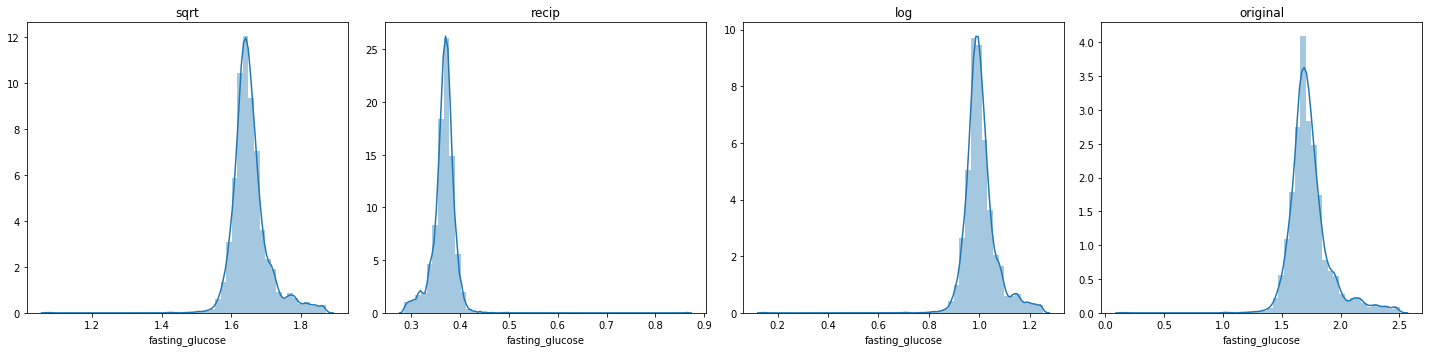

In [363]:
transform_nums = ['fasting_glucose']
for tn in transform_nums:
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4,figsize=(20, 5))
    x = df[tn]
    sqrt_x = (x+1)**(0.5)
    recip = 1/(x+1)
    logx = np.log(x+1)
    sns.distplot(x,ax=ax4).set_title('original')
    sns.distplot(sqrt_x,ax=ax1).set_title('sqrt')
    sns.distplot(recip,ax=ax2).set_title('recip')
    sns.distplot(logx,ax=ax3).set_title('log')
    fig.tight_layout()

In [364]:
df['fasting_glucose'] = (df['fasting_glucose'])**(0.5)

skew_degree = df[numerical_variables].skew().sort_values(ascending=False)
skew_degree

fasting_glucose    0.494428
HDL                0.470239
LDL                0.409376
sysBP              0.337034
BMI                0.231939
age                0.109962
diaBP              0.030169
insulin           -0.095614
dtype: float64

In [365]:
# Numerical feature scaling 
scaler = StandardScaler()
df_numerical = scaler.fit_transform(df_numerical)
df[numerical_variables] = df_numerical
df.head()

,BMI,HDL,LDL,age,diabetes,fasting_glucose,gender,insulin,race,sysBP,...,gender_NaN,LDL_NaN,HDL_NaN,insulin_NaN,age_NaN,race_NaN,sugar_NaN,sysBP_NaN,diaBP_NaN,alc_days_year_NaN
0,0.171007,0.388401,-1.617030,1.340321,1.0,3.632066,1.0,-0.643259,3.0,1.307426,...,0,0,0,0,0,0,1,0,0,0
1,-1.591968,1.714661,-0.257206,1.394976,0.0,0.247396,2.0,-0.574485,3.0,1.039709,...,0,0,0,0,0,0,1,0,0,0
2,1.143111,0.272732,-0.378703,0.739115,0.0,0.405583,2.0,0.687046,3.0,0.134869,...,0,0,0,0,0,0,0,0,0,0
3,-1.453946,2.204619,-1.284084,-1.173813,0.0,-0.810585,2.0,-1.231111,3.0,-1.136500,...,0,0,0,0,0,0,1,0,0,0
4,-0.919658,-0.039186,-1.042259,-0.791228,0.0,-1.141771,2.0,-0.590782,6.0,0.047309,...,0,0,0,0,0,0,1,0,0,1


In [366]:
# one hot encoding
df['race'] = pd.Categorical(df['race'])
dfDummies = pd.get_dummies(df['race'], prefix = 'race')
df = pd.concat([df, dfDummies], axis=1)

In [367]:

y = df['diabetes'].values
X = df.drop(['diabetes'],axis = 1).values
X_names = df.drop(['diabetes'],axis = 1).columns
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state = 2)


In [368]:
def plot_roc(y_val,y_val_predictions,best_clf,X_val):
    probability = best_clf.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_val_predictions)
    print('AUC: = %0.2f' % roc_auc)
    fpr, tpr, thresholds = roc_curve(y_val, probability)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate - False alarm')
    plt.ylabel('True Positive Rate - Recall')
#     plt.title(clf_name + '  --  AUC: = %0.2f' % roc_auc)
    plt.legend(['ROC','Completely random'],loc="lower right")
    plt.show()

In [369]:
def plot_confusion_matrix(y_val, y_val_predictions):
    cm = metrics.confusion_matrix(y_val, y_val_predictions)

    class_names=[0,1] 
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [370]:
# Create a series with feature importances:
def feature_importance(best_clf,X_names):
    featimp = pd.Series(best_clf.feature_importances_, index=X_names).sort_values(ascending=False)
    print('feature importance')
    print(featimp)
    sns.barplot(x=featimp, y=featimp.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
    return featimp


In [371]:
def no_cv(clf, X_train, y_train, X_val, y_val):    
    
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)

    print()
    print('Train')
    print(classification_report(y_train, y_train_pred,target_names=['healthy','mentally ill']))
    print('Val')
    print(classification_report(y_val, y_val_pred,target_names=['healthy','mentally ill']))
    print('Logloss: %.2f' % log_loss(y_val, y_val_pred))
    
    return clf

def cv(clf, X_train_val, y_train_val):
    inner_cv = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
    
    accuracy_scores = cross_val_score(clf, X_train_val, y_train_val, cv=10, scoring = 'accuracy')
    precision_scores = cross_val_score(clf, X_train_val, y_train_val, cv=10, scoring = 'precision')
    recall_scores = cross_val_score(clf, X_train_val, y_train_val, cv=10, scoring = 'recall')

    print('accuracy')
    print(mean(accuracy_scores))
    print(accuracy_scores)
    print('recall')
    print(mean(recall_scores))
    print(recall_scores)
    print('precision')
    print(mean(precision_scores))
    print(precision_scores)
    

In [372]:
def hyperparameters(clf, method, grid, X_train, y_train, X_val):
    
    if method == 'random':
        clf_search = RandomizedSearchCV(clf, param_distributions = grid, verbose=2, random_state=42, n_jobs = -1)
    elif method == 'gridsearch':
        clf_search = GridSearchCV(clf, param_grid = grid, n_jobs = -1,scoring = 'f1', refit = True)
    else: 
        print('not included')

    clf_search.fit(X_train,y_train)
    best_clf = clf_search.best_estimator_
    best_clf = best_clf.fit(X_train,y_train)
    y_train_pred = best_clf.predict(X_train)
    y_val_pred = best_clf.predict(X_val)
    
    plot_roc(y_val,y_val_pred,best_clf,X_val)
    plot_confusion_matrix(y_val, y_val_pred)
    

    print()
    print('Train')
    print(classification_report(y_train, y_train_pred,target_names=['healthy','mentally ill']))
    print('Val')
    print(classification_report(y_val, y_val_pred,target_names=['healthy','mentally ill']))
    print('Logloss: %.2f' % log_loss(y_val, y_val_pred))
    print("Best Parameters: {}".format(clf_search.best_params_))
    
    return best_clf


#### Attempt 1: unselected features + random forest ( already selected)

In [373]:
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 105, num = 10)]
max_features = list(range(1,X_train.shape[1]))
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
min_samples_split = [10,20,30,40,50]
min_samples_leaf = [10,20,30,40,50] 
bootstrap = [True]

rf_grid =  {'rf__bootstrap': bootstrap,
         'rf__max_depth': max_depth,
         'rf__max_features': max_features,
         'rf__min_samples_leaf': min_samples_leaf,
         'rf__min_samples_split': min_samples_split,
         'rf__n_estimators': n_estimators}

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.6s finished


AUC: = 0.81


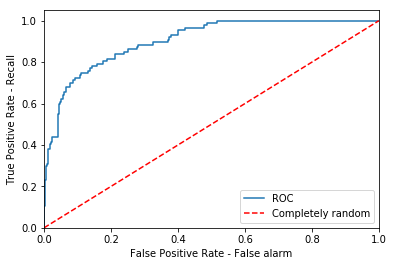

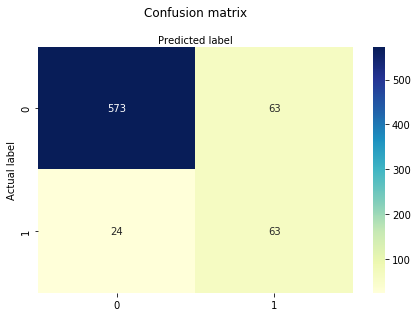


Train
              precision    recall  f1-score   support

     healthy       0.99      0.94      0.96      2591
mentally ill       0.63      0.88      0.73       297

    accuracy                           0.93      2888
   macro avg       0.81      0.91      0.85      2888
weighted avg       0.95      0.93      0.94      2888

Val
              precision    recall  f1-score   support

     healthy       0.96      0.90      0.93       636
mentally ill       0.50      0.72      0.59        87

    accuracy                           0.88       723
   macro avg       0.73      0.81      0.76       723
weighted avg       0.90      0.88      0.89       723

Logloss: 4.16
Best Parameters: {'rf__n_estimators': 38, 'rf__min_samples_split': 30, 'rf__min_samples_leaf': 10, 'rf__max_features': 11, 'rf__max_depth': 18, 'rf__bootstrap': True}
accuracy
0.8903307264963806
[0.90607735 0.88919668 0.90027701 0.90027701 0.89473684 0.88919668
 0.86703601 0.87257618 0.90304709 0.88088643]
recall
0.7033

In [374]:
sm = SMOTE(random_state=42)
rf = RandomForestClassifier(random_state = 42, criterion= 'gini')
pipeline1 = Pipeline([('sm', sm), ('rf', rf)])
best_rf = hyperparameters(pipeline1,'random',rf_grid, X_train, y_train, X_val)
cv(best_rf, X_train_val, y_train_val)

feature importance
fasting_glucose        0.450267
age                    0.189810
LDL                    0.051410
BMI                    0.050565
alc_days_year_NaN      0.048814
insulin                0.033611
gender                 0.032795
sysBP                  0.028075
race_4.0               0.021179
HDL                    0.020458
race_3.0               0.019880
diaBP                  0.019228
race                   0.013626
race_1.0               0.004939
sugar_NaN              0.004181
race_2.0               0.002911
diaBP_NaN              0.002332
sysBP_NaN              0.001955
race_6.0               0.001473
fasting_glucose_NaN    0.001143
LDL_NaN                0.000933
BMI_NaN                0.000351
race_7.0               0.000064
gender_NaN             0.000000
HDL_NaN                0.000000
insulin_NaN            0.000000
age_NaN                0.000000
race_NaN               0.000000
dtype: float64


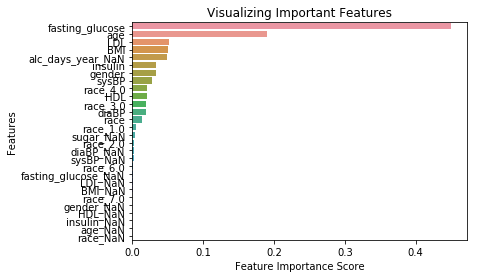

In [375]:
rf = best_rf[1] # best_rf is a pipeline, pipeline has no featimp, index rf
featimp = feature_importance(rf,X_names)

In [376]:
important_features = []
for feature, score in featimp.items():
    if score > 0.001:
        important_features.append(feature)

In [377]:
# this time only use important features to rebuild rf see if it changes the result by much
dfxtrain = pd.DataFrame(X_train,columns = [X_names]) # original df X_train
dfxval = pd.DataFrame(X_val,columns = [X_names])     # original df X_val

X_train_imp = dfxtrain[important_features]
X_val_imp = dfxval[important_features]
print(X_train_imp.shape)
print(X_val_imp.shape)
type(X_train_imp)

X_train_val_imp = pd.concat([X_train_imp,X_val_imp]).values
X_train_val_imp.shape

(2888, 20)
(723, 20)


(3611, 20)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.3s finished


AUC: = 0.81


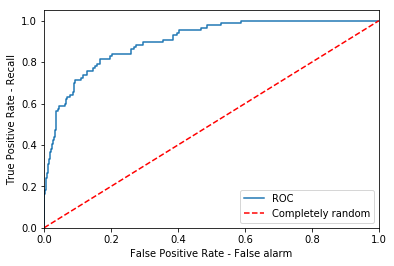

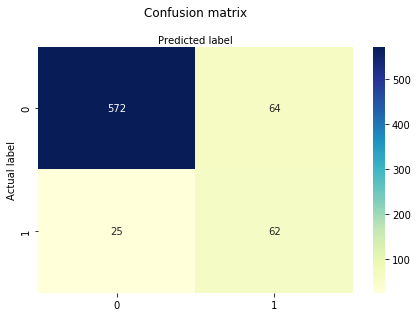


Train
              precision    recall  f1-score   support

     healthy       0.98      0.94      0.96      2591
mentally ill       0.63      0.86      0.73       297

    accuracy                           0.93      2888
   macro avg       0.81      0.90      0.85      2888
weighted avg       0.95      0.93      0.94      2888

Val
              precision    recall  f1-score   support

     healthy       0.96      0.90      0.93       636
mentally ill       0.49      0.71      0.58        87

    accuracy                           0.88       723
   macro avg       0.73      0.81      0.75       723
weighted avg       0.90      0.88      0.89       723

Logloss: 4.25
Best Parameters: {'rf__n_estimators': 38, 'rf__min_samples_split': 30, 'rf__min_samples_leaf': 10, 'rf__max_features': 11, 'rf__max_depth': 18, 'rf__bootstrap': True}
accuracy
0.8457507537380817
[0.83977901 0.82271468 0.8365651  0.85872576 0.83933518 0.84764543
 0.85595568 0.84487535 0.85041551 0.86149584]
recall
0.0493

In [378]:
best_rf = hyperparameters(pipeline1,'random',rf_grid, X_train_imp.values, y_train, X_val_imp.values)
cv(best_rf, X_train_val_imp, y_train_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.0s finished


AUC: = 0.80


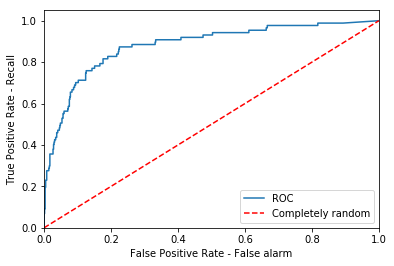

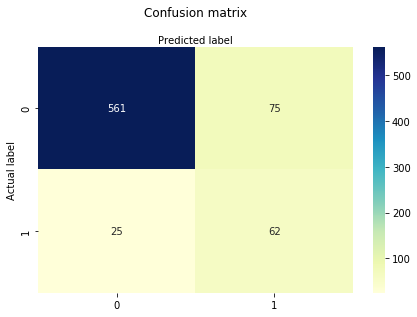


Train
              precision    recall  f1-score   support

     healthy       0.99      0.93      0.96      2591
mentally ill       0.61      0.91      0.73       297

    accuracy                           0.93      2888
   macro avg       0.80      0.92      0.85      2888
weighted avg       0.95      0.93      0.94      2888

Val
              precision    recall  f1-score   support

     healthy       0.96      0.88      0.92       636
mentally ill       0.45      0.71      0.55        87

    accuracy                           0.86       723
   macro avg       0.70      0.80      0.74       723
weighted avg       0.90      0.86      0.87       723

Logloss: 4.78
Best Parameters: {'rf__n_estimators': 38, 'rf__min_samples_split': 30, 'rf__min_samples_leaf': 10, 'rf__max_features': 11, 'rf__max_depth': 18, 'rf__bootstrap': True}
accuracy
0.7482690806691051
[0.74861878 0.73961219 0.76177285 0.7534626  0.73407202 0.72576177
 0.78947368 0.73961219 0.75623269 0.73407202]
recall
0.2186

In [379]:
pca = PCA(0.95)
pipeline2 = Pipeline([('sm', sm),('pca',pca),('rf', rf)])
best_rf = hyperparameters(pipeline2,'random',rf_grid, X_train_imp.values, y_train, X_val_imp.values)
cv(best_rf, X_train_val_imp, y_train_val)

#### Attempt 2: selected features using Lasso + logreg
* A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression. 

In [380]:
# logreg: default L2
logreg = LogisticRegression()
pipeline2 = Pipeline([('sm', sm), ('logreg', logreg)])
no_cv(pipeline2, X_train, y_train, X_val, y_val)


Train
              precision    recall  f1-score   support

     healthy       0.98      0.84      0.90      2591
mentally ill       0.37      0.82      0.52       297

    accuracy                           0.84      2888
   macro avg       0.68      0.83      0.71      2888
weighted avg       0.91      0.84      0.86      2888

Val
              precision    recall  f1-score   support

     healthy       0.97      0.84      0.90       636
mentally ill       0.40      0.79      0.53        87

    accuracy                           0.83       723
   macro avg       0.69      0.82      0.72       723
weighted avg       0.90      0.83      0.86       723

Logloss: 5.73


Pipeline(memory=None,
         steps=[('sm',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('logreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [381]:
# lasso
logreg = LogisticRegression(penalty='l1',n_jobs =-1,solver='liblinear')
pipeline3 = Pipeline([('sm', sm), ('logreg', logreg)])
no_cv(pipeline3, X_train, y_train, X_val, y_val)


Train
              precision    recall  f1-score   support

     healthy       0.98      0.84      0.90      2591
mentally ill       0.38      0.82      0.52       297

    accuracy                           0.84      2888
   macro avg       0.68      0.83      0.71      2888
weighted avg       0.91      0.84      0.86      2888

Val
              precision    recall  f1-score   support

     healthy       0.97      0.84      0.90       636
mentally ill       0.40      0.78      0.53        87

    accuracy                           0.83       723
   macro avg       0.68      0.81      0.71       723
weighted avg       0.90      0.83      0.85       723

Logloss: 5.88


Pipeline(memory=None,
         steps=[('sm',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('logreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=-1, penalty='l1',
                                    random_state=None, solver='liblinear',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

AUC: = 0.81


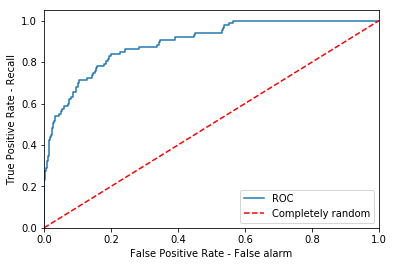

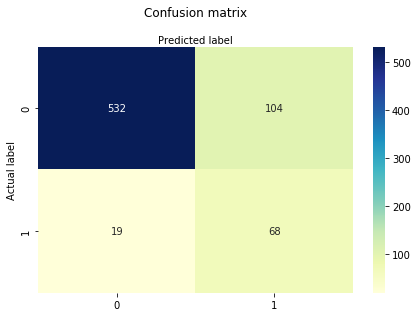


Train
              precision    recall  f1-score   support

     healthy       0.98      0.84      0.91      2591
mentally ill       0.38      0.82      0.52       297

    accuracy                           0.84      2888
   macro avg       0.68      0.83      0.71      2888
weighted avg       0.92      0.84      0.87      2888

Val
              precision    recall  f1-score   support

     healthy       0.97      0.84      0.90       636
mentally ill       0.40      0.78      0.53        87

    accuracy                           0.83       723
   macro avg       0.68      0.81      0.71       723
weighted avg       0.90      0.83      0.85       723

Logloss: 5.88
Best Parameters: {'logreg__C': 1}

Train
              precision    recall  f1-score   support

     healthy       0.98      0.84      0.90      2591
mentally ill       0.38      0.82      0.52       297

    accuracy                           0.84      2888
   macro avg       0.68      0.83      0.71      2888
weighted

Pipeline(memory=None,
         steps=[('sm',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('logreg',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=-1, penalty='l1',
                                    random_state=None, solver='liblinear',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [382]:
grid = {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
best_logreg = hyperparameters(pipeline3, 'gridsearch', grid , X_train, y_train, X_val)
no_cv(best_logreg,X_train, y_train, X_val, y_val)

In [383]:
cv(best_logreg,X_train_val,y_train_val)

accuracy
0.8371619656877
[0.84530387 0.8365651  0.83933518 0.86703601 0.88365651 0.80886427
 0.8033241  0.8365651  0.82548476 0.82548476]
recall
0.80472334682861
[0.84615385 0.78947368 0.86842105 0.86842105 0.78947368 0.76315789
 0.76315789 0.74358974 0.76923077 0.84615385]
precision
0.3794770599279429
[0.39759036 0.37037037 0.38372093 0.43421053 0.46875    0.3258427
 0.31868132 0.37179487 0.35714286 0.36666667]


AUC: = 0.81


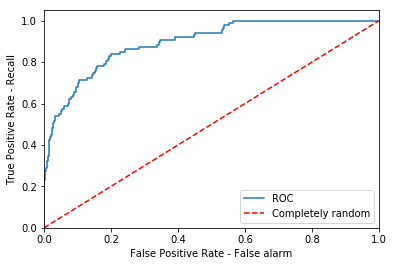

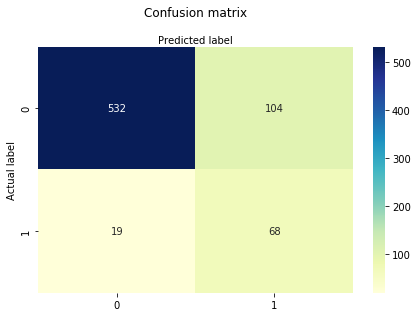


Train
              precision    recall  f1-score   support

     healthy       0.98      0.84      0.91      2591
mentally ill       0.38      0.82      0.52       297

    accuracy                           0.84      2888
   macro avg       0.68      0.83      0.71      2888
weighted avg       0.92      0.84      0.87      2888

Val
              precision    recall  f1-score   support

     healthy       0.97      0.84      0.90       636
mentally ill       0.40      0.78      0.53        87

    accuracy                           0.83       723
   macro avg       0.68      0.81      0.71       723
weighted avg       0.90      0.83      0.85       723

Logloss: 5.88
Best Parameters: {'logreg__C': 1}
accuracy
0.8371619656877
[0.84530387 0.8365651  0.83933518 0.86703601 0.88365651 0.80886427
 0.8033241  0.8365651  0.82548476 0.82548476]
recall
0.80472334682861
[0.84615385 0.78947368 0.86842105 0.86842105 0.78947368 0.76315789
 0.76315789 0.74358974 0.76923077 0.84615385]
precision
0.

In [384]:
pipeline4 = Pipeline([('sm', sm), ('pca',pca),('logreg', logreg)])
best_logreg = hyperparameters(pipeline3, 'gridsearch', grid , X_train, y_train, X_val)
cv(best_logreg,X_train_val,y_train_val)

#### Attempt 3: knn



In [385]:
knn = KNeighborsClassifier()
pipeline5 = Pipeline([('sm', sm),('knn', knn)])
no_cv(pipeline5, X_train, y_train, X_val, y_val)


Train
              precision    recall  f1-score   support

     healthy       1.00      0.90      0.95      2591
mentally ill       0.53      1.00      0.69       297

    accuracy                           0.91      2888
   macro avg       0.76      0.95      0.82      2888
weighted avg       0.95      0.91      0.92      2888

Val
              precision    recall  f1-score   support

     healthy       0.95      0.83      0.89       636
mentally ill       0.37      0.70      0.48        87

    accuracy                           0.82       723
   macro avg       0.66      0.77      0.68       723
weighted avg       0.88      0.82      0.84       723

Logloss: 6.31


Pipeline(memory=None,
         steps=[('sm',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

* small k: low bias, high variance; large k: high bias, low variance

AUC: = 0.75


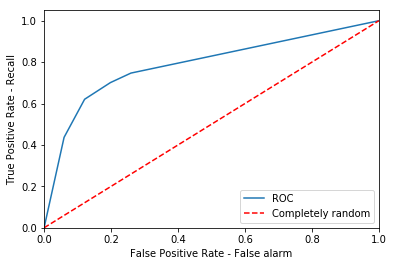

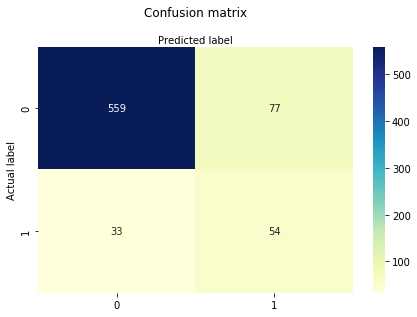


Train
              precision    recall  f1-score   support

     healthy       1.00      0.94      0.97      2591
mentally ill       0.66      1.00      0.80       297

    accuracy                           0.95      2888
   macro avg       0.83      0.97      0.88      2888
weighted avg       0.97      0.95      0.95      2888

Val
              precision    recall  f1-score   support

     healthy       0.94      0.88      0.91       636
mentally ill       0.41      0.62      0.50        87

    accuracy                           0.85       723
   macro avg       0.68      0.75      0.70       723
weighted avg       0.88      0.85      0.86       723

Logloss: 5.25
Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 4, 'knn__weights': 'uniform'}


In [386]:
knn_grid =  {'knn__metric': ['euclidean','manhattan'],
             'knn__weights': ['uniform','distance'],
             'knn__n_neighbors': [3,4,5,7,10,15,20]}
best_knn = hyperparameters(pipeline5,'gridsearch',knn_grid, X_train, y_train, X_val)

In [387]:
cv(best_knn, X_train_val, y_train_val)

accuracy
0.867065854517072
[0.89226519 0.89196676 0.88088643 0.86149584 0.87534626 0.85872576
 0.84210526 0.86426593 0.85595568 0.84764543]
recall
0.6537112010796221
[0.74358974 0.73684211 0.63157895 0.71052632 0.60526316 0.63157895
 0.63157895 0.66666667 0.53846154 0.64102564]
precision
0.42187239095869744
[0.5        0.49122807 0.45283019 0.40909091 0.43396226 0.39344262
 0.35820896 0.41935484 0.38181818 0.37878788]


AUC: = 0.74


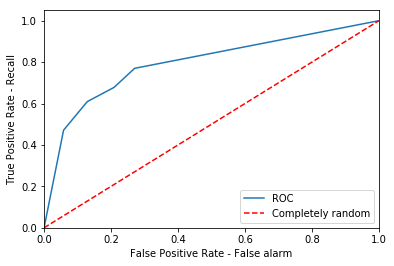

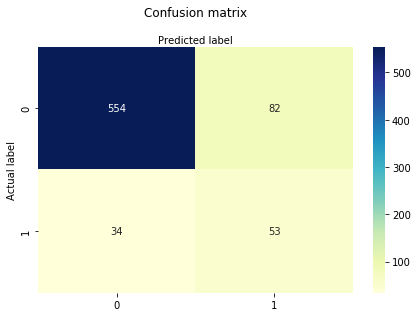


Train
              precision    recall  f1-score   support

     healthy       1.00      0.94      0.97      2591
mentally ill       0.67      1.00      0.80       297

    accuracy                           0.95      2888
   macro avg       0.83      0.97      0.88      2888
weighted avg       0.97      0.95      0.95      2888

Val
              precision    recall  f1-score   support

     healthy       0.94      0.87      0.91       636
mentally ill       0.39      0.61      0.48        87

    accuracy                           0.84       723
   macro avg       0.67      0.74      0.69       723
weighted avg       0.88      0.84      0.85       723

Logloss: 5.54
Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 4, 'knn__weights': 'uniform'}
accuracy
0.8695619901746223
[0.88121547 0.88919668 0.88088643 0.86980609 0.88642659 0.86980609
 0.8365651  0.85041551 0.85872576 0.87257618]
recall
0.6875168690958164
[0.76923077 0.71052632 0.65789474 0.73684211 0.68421053 0.

In [388]:
pipeline6 = Pipeline([('sm', sm),('pca',pca),('knn', knn)])
best_knn = hyperparameters(pipeline6,'gridsearch',knn_grid, X_train, y_train, X_val)
cv(best_knn, X_train_val, y_train_val)

#### Attempt 4: XGBoost


In [389]:
xgb1 = XGBClassifier()
pipeline7 = Pipeline([('sm', sm),('xgb1', xgb1)])
no_cv(pipeline7, X_train, y_train, X_val, y_val)



Train
              precision    recall  f1-score   support

     healthy       0.98      0.95      0.96      2591
mentally ill       0.64      0.79      0.71       297

    accuracy                           0.93      2888
   macro avg       0.81      0.87      0.83      2888
weighted avg       0.94      0.93      0.94      2888

Val
              precision    recall  f1-score   support

     healthy       0.95      0.92      0.94       636
mentally ill       0.53      0.64      0.58        87

    accuracy                           0.89       723
   macro avg       0.74      0.78      0.76       723
weighted avg       0.90      0.89      0.89       723

Logloss: 3.82


Pipeline(memory=None,
         steps=[('sm',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('xgb1',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                      

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   25.3s finished


AUC: = 0.77


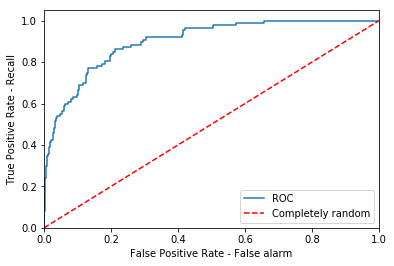

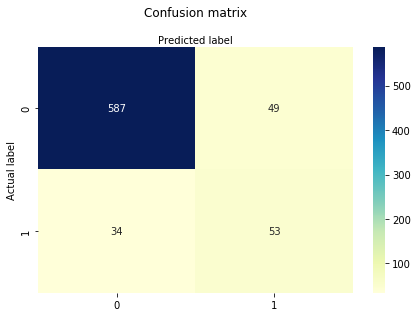


Train
              precision    recall  f1-score   support

     healthy       0.98      0.97      0.97      2591
mentally ill       0.73      0.81      0.77       297

    accuracy                           0.95      2888
   macro avg       0.85      0.89      0.87      2888
weighted avg       0.95      0.95      0.95      2888

Val
              precision    recall  f1-score   support

     healthy       0.95      0.92      0.93       636
mentally ill       0.52      0.61      0.56        87

    accuracy                           0.89       723
   macro avg       0.73      0.77      0.75       723
weighted avg       0.89      0.89      0.89       723

Logloss: 3.97
Best Parameters: {'xgb1__subsample': 0.8, 'xgb1__min_child_weight': 5, 'xgb1__max_depth': 5, 'xgb1__gamma': 5, 'xgb1__colsample_bytree': 0.8}


In [390]:
xgb_grid =  {'xgb1__min_child_weight': [1, 5, 10],
             'xgb1__gamma': [0.5, 1, 1.5, 2, 5],
             'xgb1__subsample': [0.6, 0.8, 1.0],
             'xgb1__colsample_bytree': [0.6, 0.8, 1.0],
             'xgb1__max_depth': [3, 4, 5]}
best_xgb1 = hyperparameters(pipeline7,'random',xgb_grid, X_train, y_train, X_val)

In [391]:
cv(best_xgb1, X_train_val, y_train_val)

accuracy
0.9091680568096601
[0.90331492 0.92243767 0.92243767 0.91412742 0.90858726 0.90581717
 0.90304709 0.91412742 0.89473684 0.90304709]
recall
0.6539136302294197
[0.66666667 0.68421053 0.71052632 0.65789474 0.60526316 0.65789474
 0.71052632 0.66666667 0.58974359 0.58974359]
precision
0.5639250883158653
[0.54166667 0.61904762 0.61363636 0.58139535 0.56097561 0.54347826
 0.52941176 0.59090909 0.51111111 0.54761905]


In [392]:
def modelfit(alg, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    alg = no_cv(alg, X_train, y_train, X_val, y_val)
    print(alg.booster().get_fscore())
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')